# Group 23

### Introduction:

- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question


### Preliminary exploratory data analysis:


- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.


In [1]:
library(tidyverse)
library(RColorBrewer)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
download.file("https://raw.githubusercontent.com/Aamitoz-Sharma/Group_23_project/main/heart.csv", "heart_data.csv") #downloading file
heart_data <- read_csv("heart_data.csv")
head(heart_data)

Rows: 918 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [3]:
heart <- heart_data |> #wrangling
    select(Age, RestingBP, Cholesterol, MaxHR, HeartDisease) |>
    mutate(HeartDisease = as_factor(HeartDisease)) |>
    mutate(HeartDisease = fct_recode(HeartDisease, "yes" = "1", "no" = "0")) #changing 0 to no and 1 to yes
head(heart)

Age,RestingBP,Cholesterol,MaxHR,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,140,289,172,no
49,160,180,156,yes
37,130,283,98,no
48,138,214,108,yes
54,150,195,122,no
39,120,339,170,no


In [4]:
heart_split <- initial_split(heart, prop = 0.75, strata = HeartDisease) #splitting into training and testing data.
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

head(heart_train)
head(heart_test)

Age,RestingBP,Cholesterol,MaxHR,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
37,130,283,98,no
39,120,339,170,no
45,130,237,170,no
48,120,284,120,no
37,130,211,142,no
39,120,204,145,no


Age,RestingBP,Cholesterol,MaxHR,HeartDisease
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,140,289,172,no
49,160,180,156,yes
54,150,195,122,no
54,110,208,142,no
58,136,164,99,yes
41,130,172,130,yes


The data was split into training data and testing data.

In [5]:
number_of_heartdisease <- heart_train |> #only using training data
    group_by(HeartDisease) |>
    summarize(count = n())

mean_heart <- heart_train |>
    select(-HeartDisease) |>
    map_df(mean, na.rm = TRUE)

no_miss_data <- colSums(is.na(heart_train))

number_of_heartdisease
mean_heart
no_miss_data

HeartDisease,count
<fct>,<int>
no,307
yes,381


Age,RestingBP,Cholesterol,MaxHR
<dbl>,<dbl>,<dbl>,<dbl>
53.18605,132.2485,197.2108,137.0203


Age    RestingBP  Cholesterol        MaxHR HeartDisease 
           0            0            0            0            0

The first table shows the count of people with and without heart disease. "yes" means that the person has a heart disease while "no" means that the person does not. The second table shows the mean of all the predictors that we will use to predict HeartDisease. The last line shows the number of NA values in each predictor in the dataset. It is clear that there are no NA values present in our wrangled dataset.

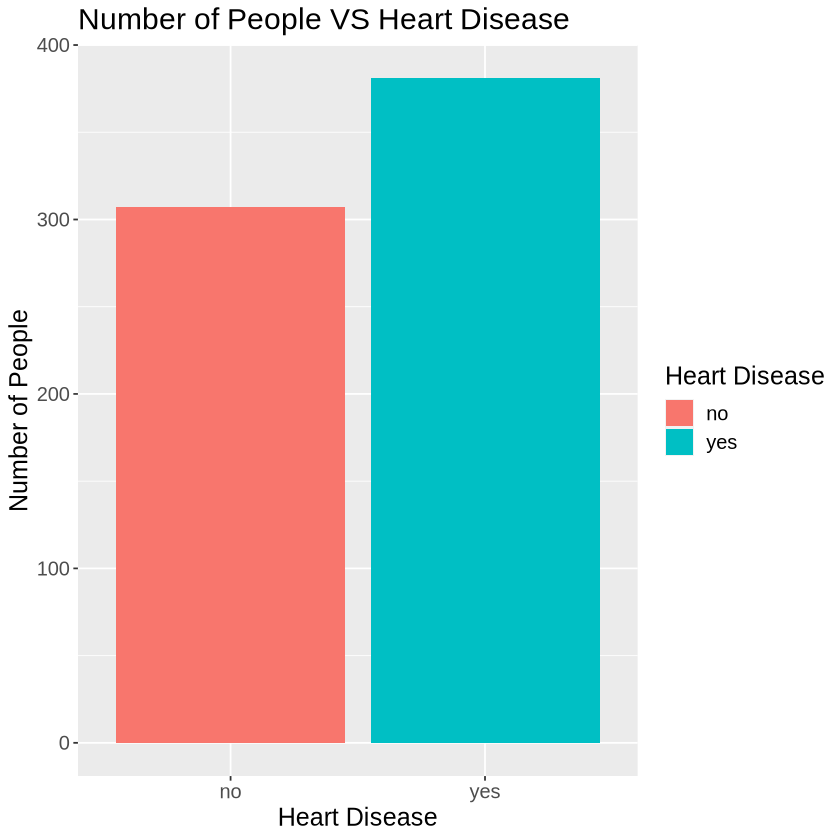

In [6]:
options(repr.plot.width = 7, repr.plot.height = 7) 
heart_disease_plot <- heart_train |>
    ggplot(aes(x = HeartDisease, fill = HeartDisease)) +
    geom_bar() +
    xlab("Heart Disease") +
    ylab("Number of People") +
    labs(fill = "Heart Disease") +
    ggtitle("Number of People VS Heart Disease") +
    theme(text = element_text(size = 15))

heart_disease_plot

The graph shows the number of people with and without heart diseases as mentioned in the training dataset. The proportions are not balanced since there are more people with heart disease than without.

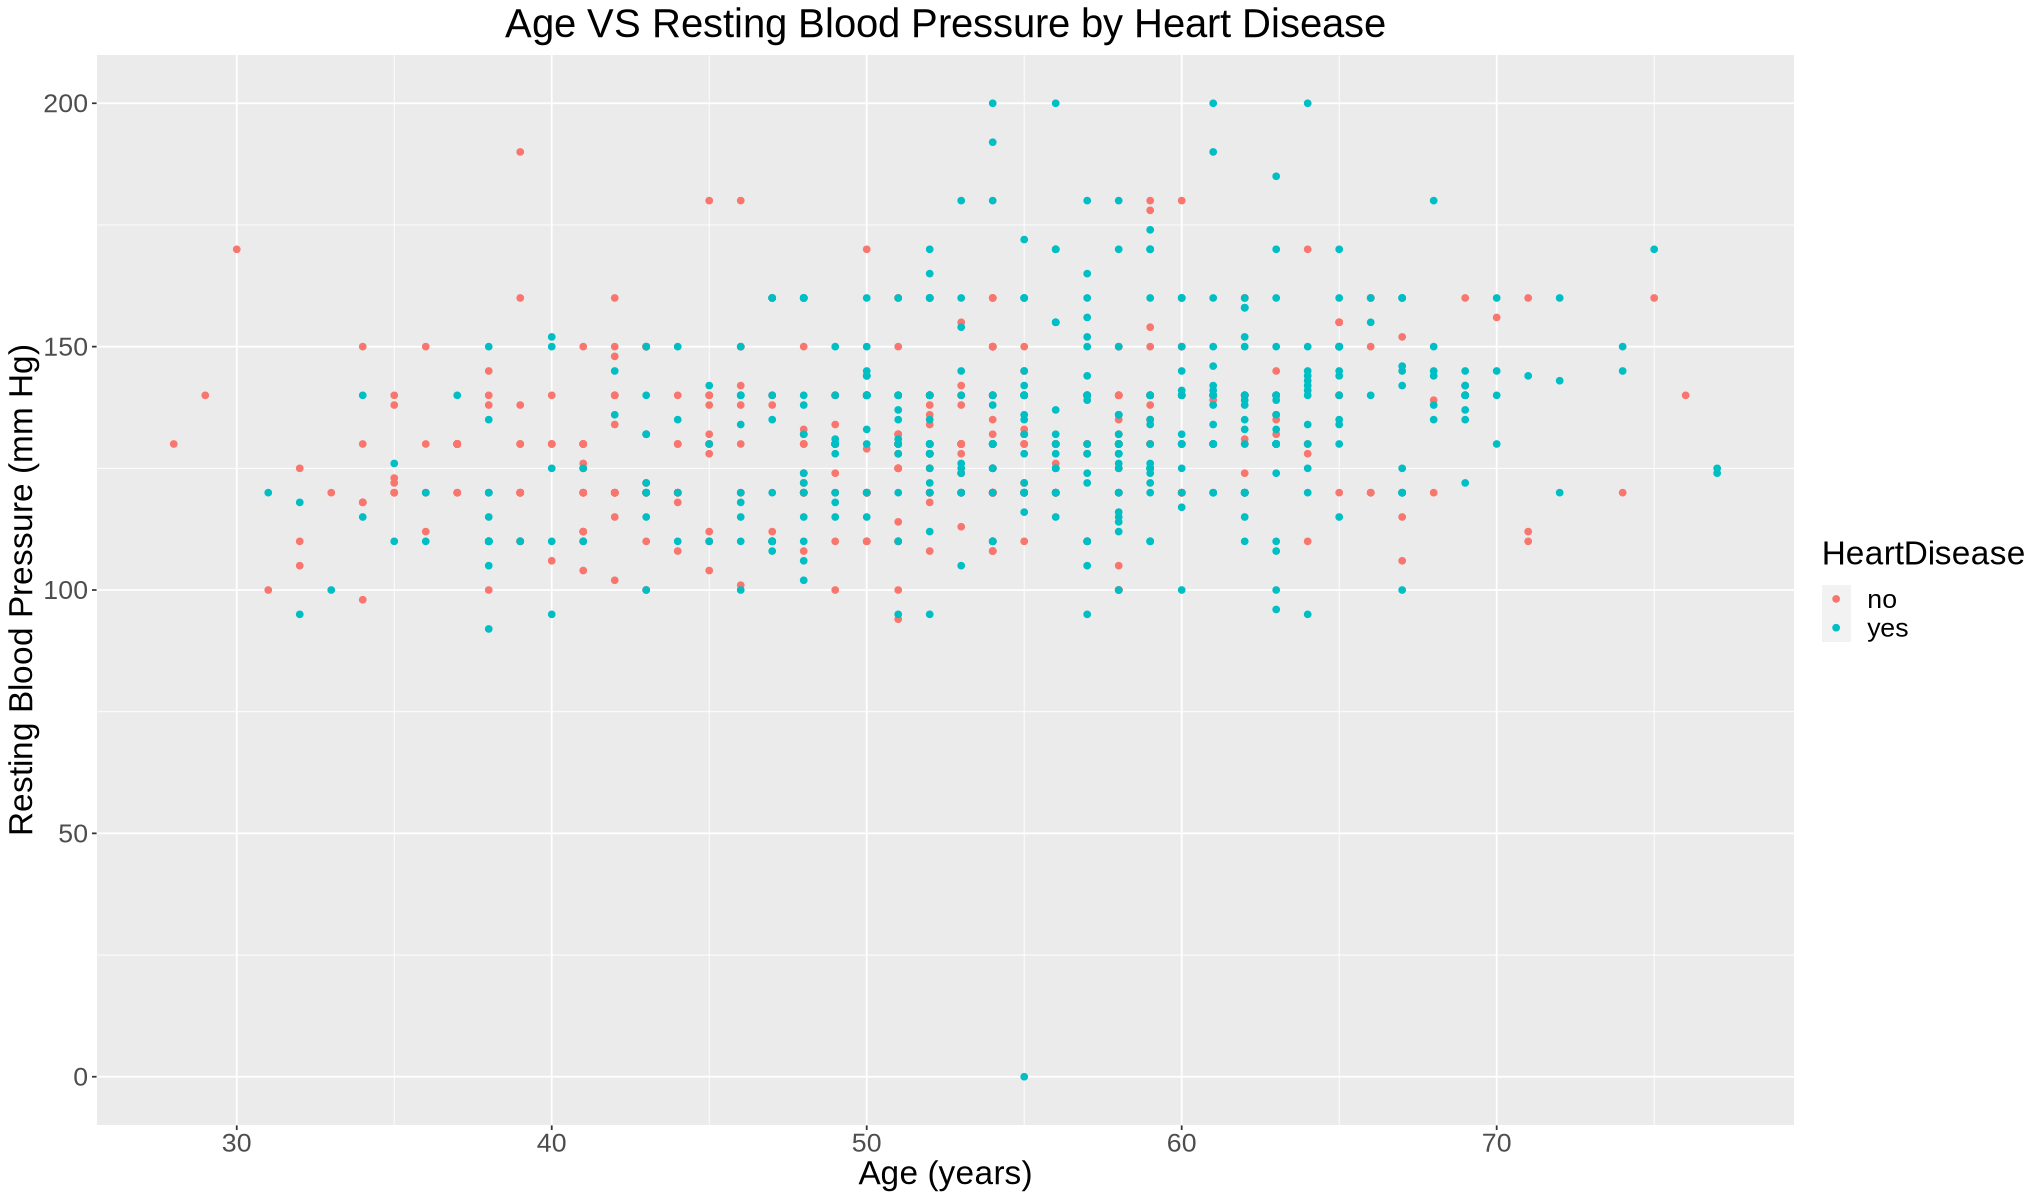

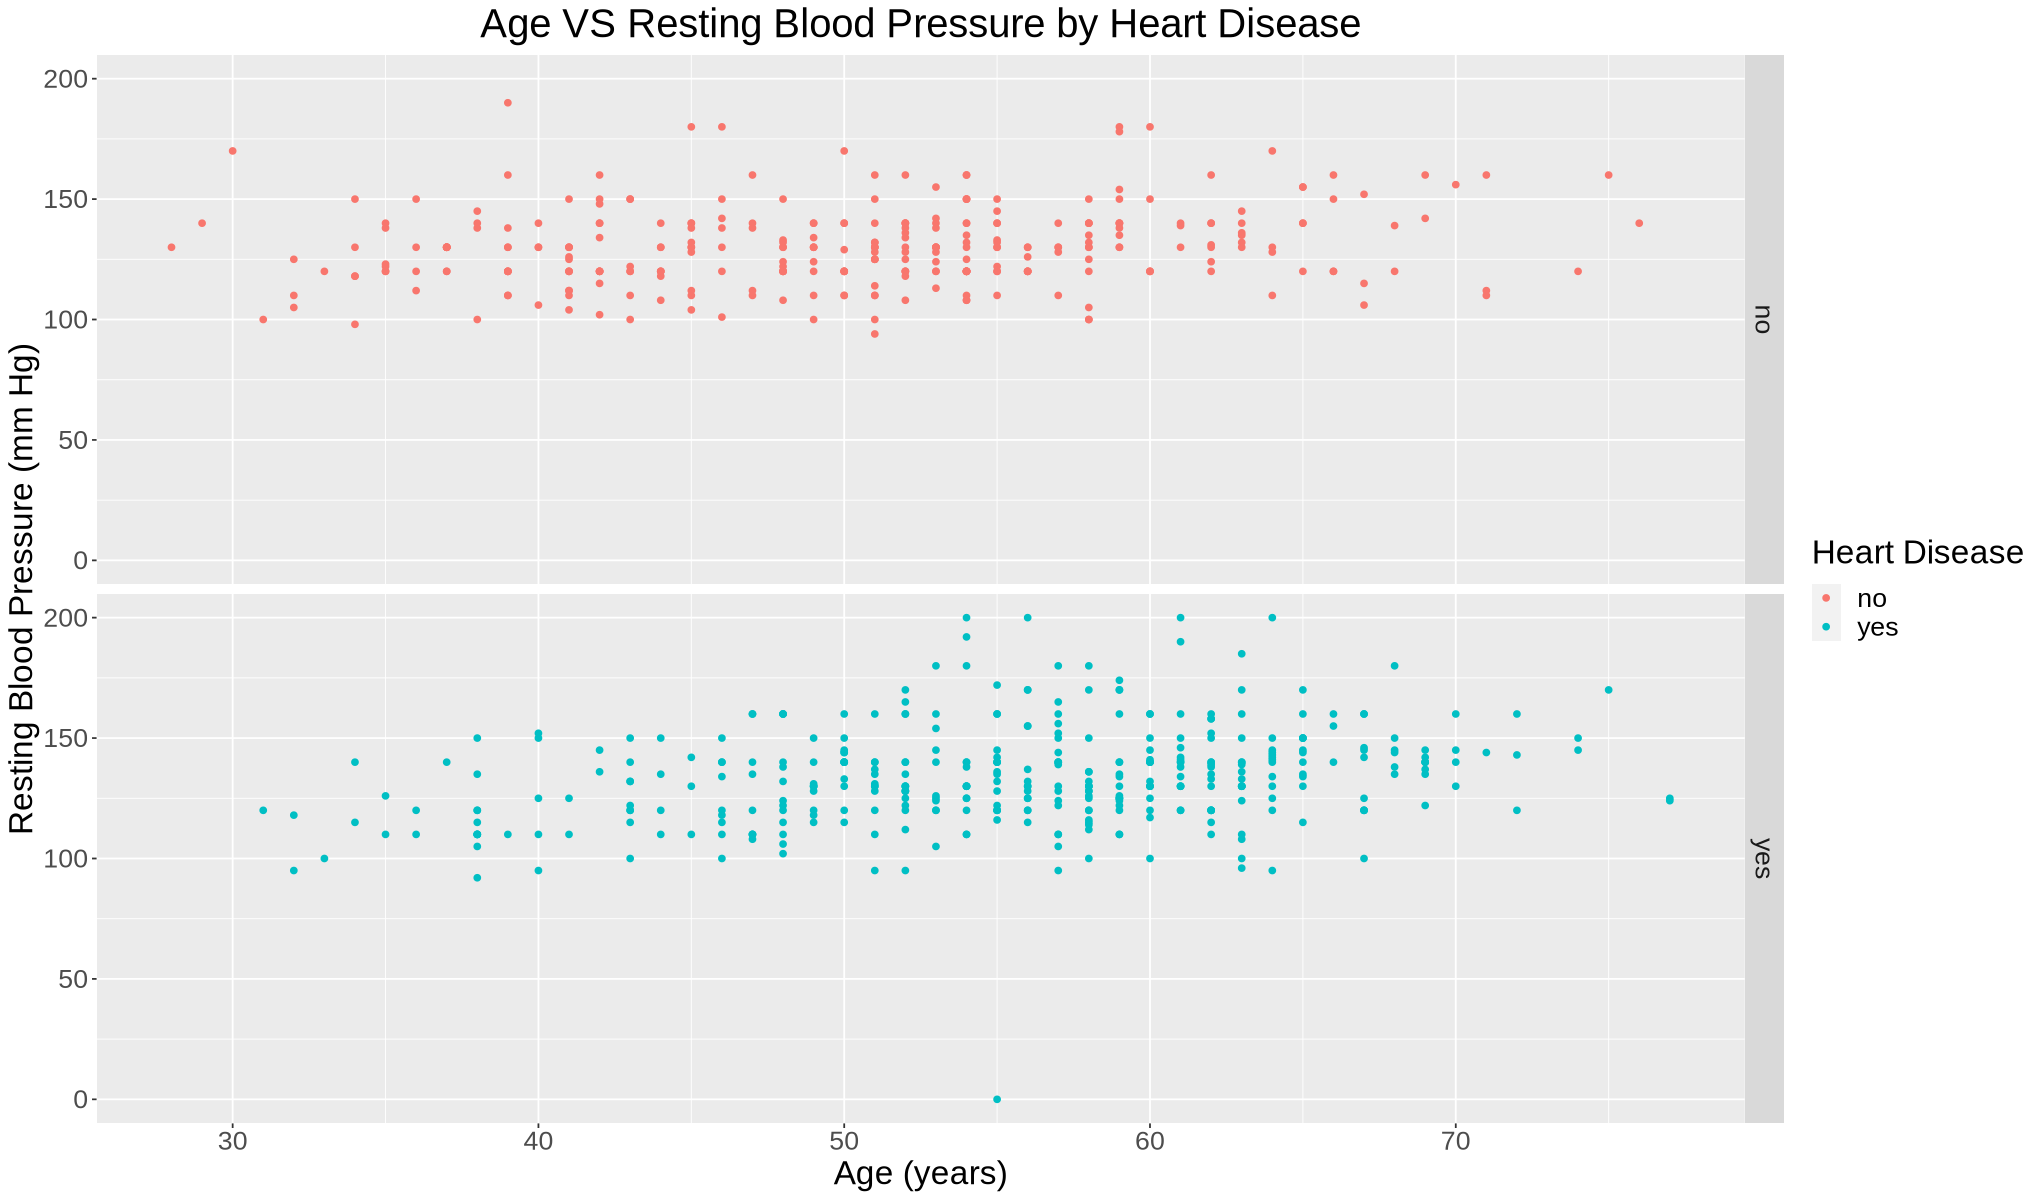

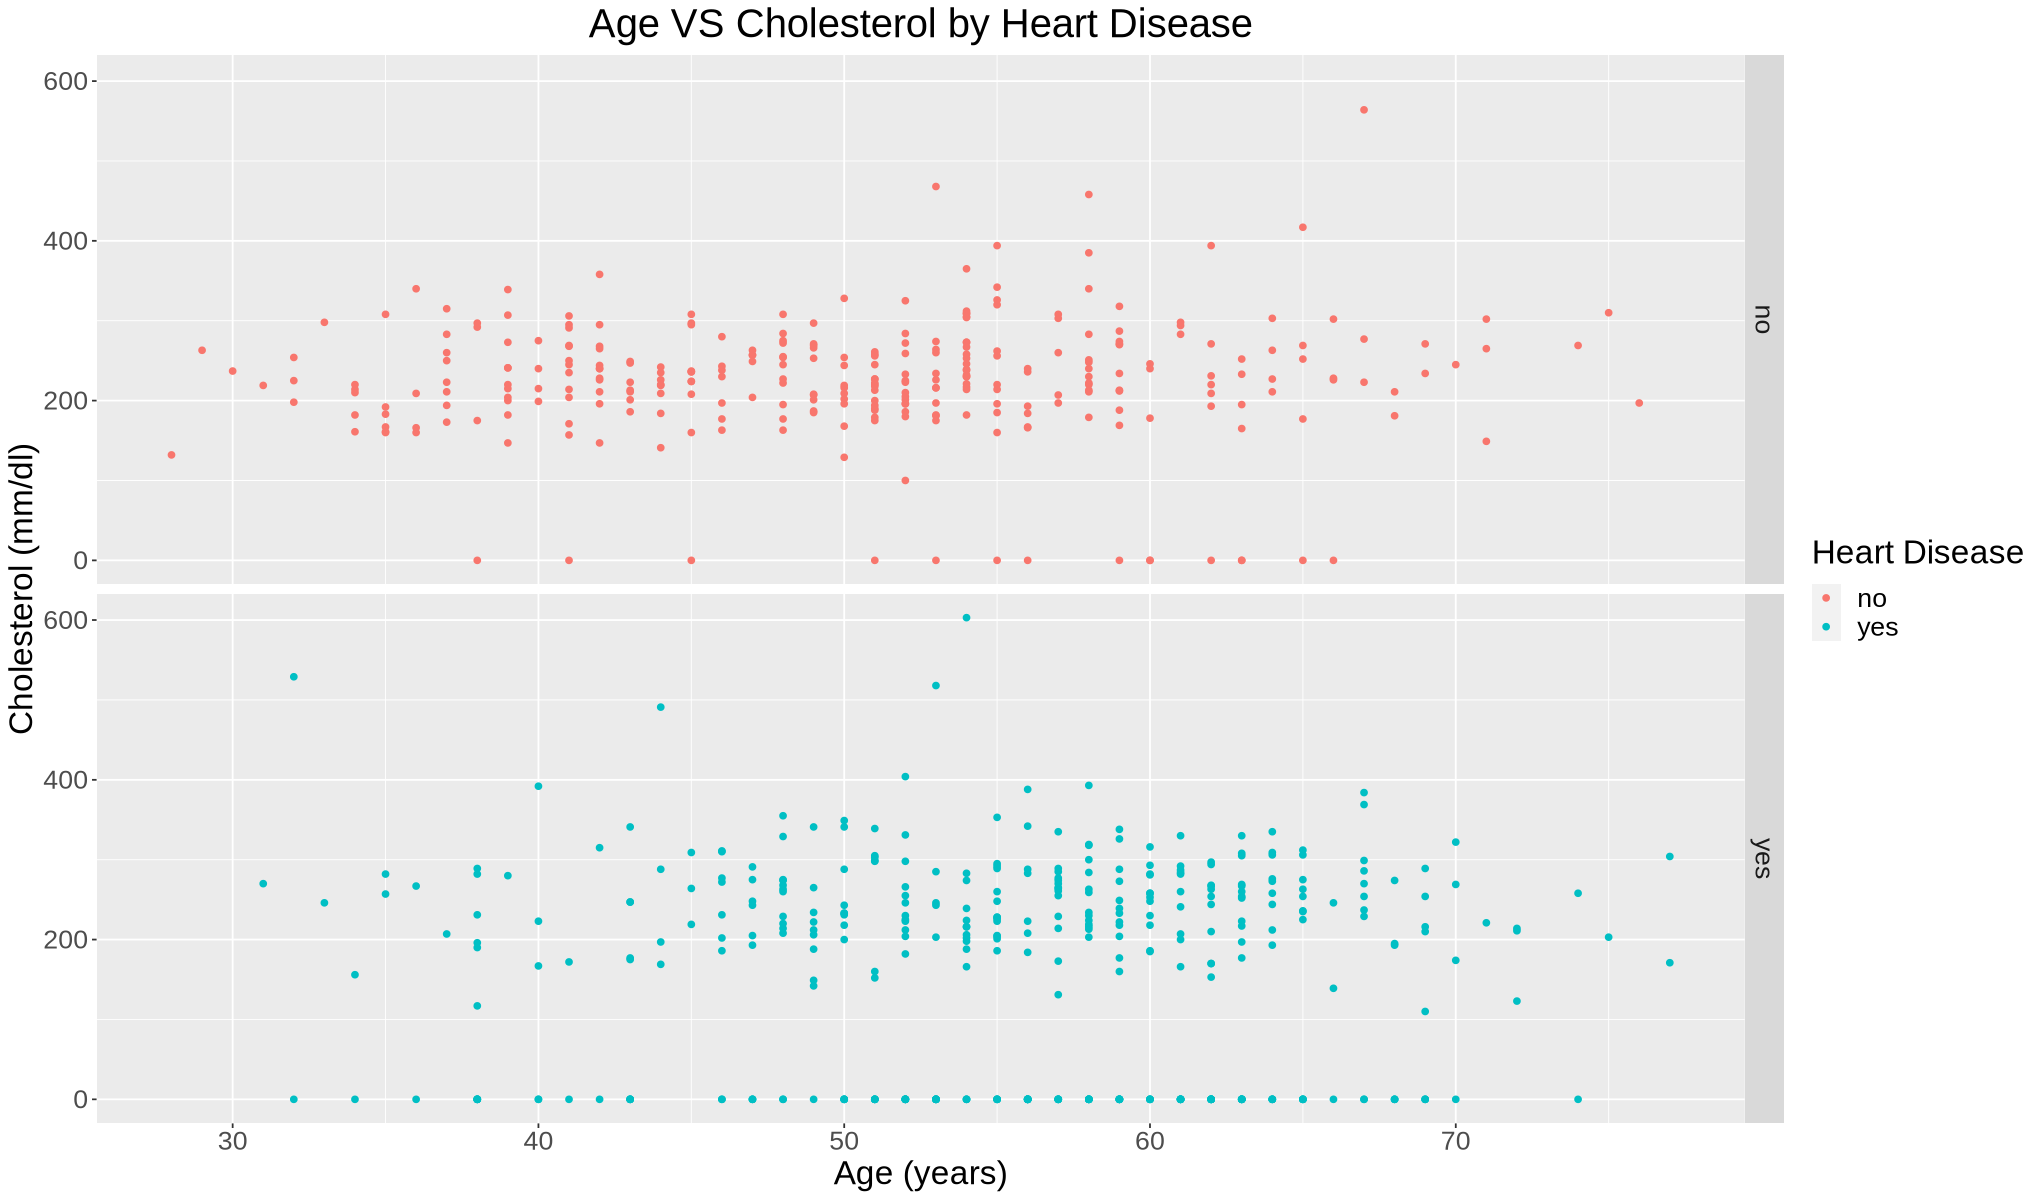

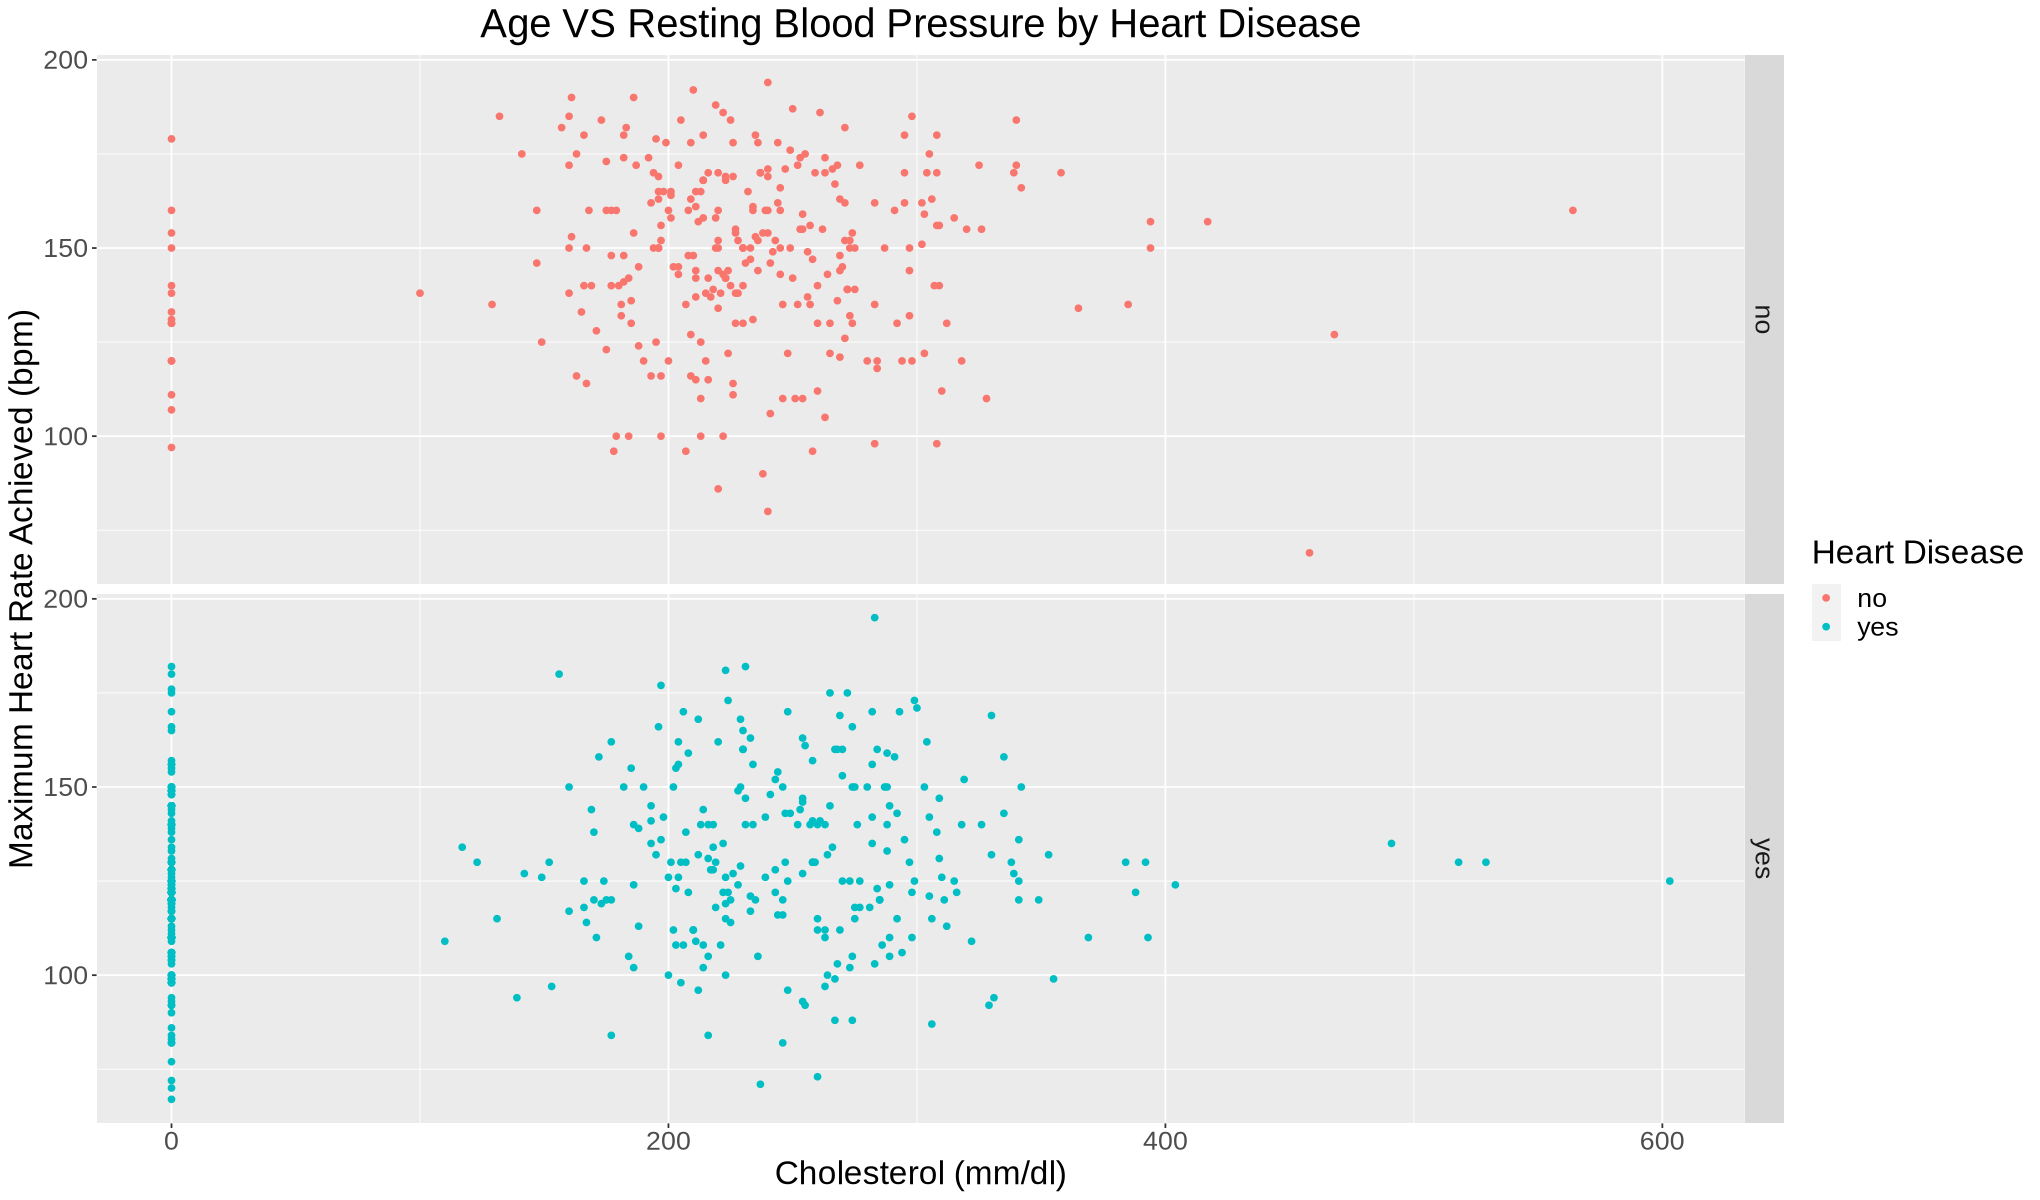

In [7]:
options(repr.plot.width = 17, repr.plot.height = 10) 
heart_plot <- heart_train |>
    ggplot(aes(x = Age, y = RestingBP, color = HeartDisease)) +
    geom_point() +
    xlab("Age (years)") +
    ylab("Resting Blood Pressure (mm Hg)") +
    labs(fill = "Heart Disease") +
    ggtitle("Age VS Resting Blood Pressure by Heart Disease") +
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

heart_plot1 <- heart_train |>
    ggplot(aes(x = Age, y = RestingBP, color = HeartDisease)) +
    geom_point() +
    xlab("Age (years)") +
    ylab("Resting Blood Pressure (mm Hg)") +
    labs(color = "Heart Disease") +
    ggtitle("Age VS Resting Blood Pressure by Heart Disease") +
    facet_grid(rows = vars(HeartDisease)) +
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

heart_plot2 <- heart_train |>
    ggplot(aes(x = Age, y = Cholesterol, color = HeartDisease)) +
    geom_point() +
    xlab("Age (years)") +
    ylab("Cholesterol (mm/dl)") +
    labs(color = "Heart Disease") +
    ggtitle("Age VS Cholesterol by Heart Disease") +
    facet_grid(rows = vars(HeartDisease)) +
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

heart_plot3 <- heart_train |>
    ggplot(aes(x = Cholesterol, y = MaxHR, color = HeartDisease)) +
    geom_point() +
    xlab("Cholesterol (mm/dl)") +
    ylab("Maximum Heart Rate Achieved (bpm)") +
    labs(color = "Heart Disease") +
    ggtitle("Age VS Resting Blood Pressure by Heart Disease") +
    facet_grid(rows = vars(HeartDisease)) +
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

heart_plot
heart_plot1
heart_plot2
heart_plot3


The graphs shown above show the relationship between the predictors based on whether they have heart disease or not. We can see a very slight positive trend in almost all of the graphs.

### Methods:

- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results


### Expected outcomes and significance:


- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?

